**PROGRAMMING FOR DATA SCIENCE:** Final Project

**Name:** Letizia

**Surname:** Lanza

**ID:** VR502321

**PART 1: Data Exploration and Data Wrangling**

**1. Explore the dataset:** your first task is to explore the data as seen in class, finding correlations between attributes and finding some interesting aspects that justify the next parts of the analysis.

*ATTENTION:* the topic of correlation between variables will be implemented at the end of point 3 (show some interesting plots).

The chosen dataset is available at the following Kaggle's link: https://www.kaggle.com/datasets/adarshde/electric-vehicle-population-dataset/data. 

The dataset is about the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL) and on the roads of The United States of America.

In [1]:
#import libraries

import os 
import zipfile
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
zip_file_path = 'Electric_Vehicle_Population_Data.csv.zip'  #specify the path to the ZIP file

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:  #open the ZIP file and extract the CSV file inside it
    zip_ref.extract('Electric_Vehicle_Population_Data.csv', '.')  #extract the file to the current directory

electric_vehicles = pd.read_csv('Electric_Vehicle_Population_Data.csv')  #load the extracted CSV file into a pandas dataframe 
electric_vehicles


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191402,5YJ3E1EA0K,Pierce,Sumner,WA,98390.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,31.0,314927896,POINT (-122.2337855 47.2055969),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
191403,JN1BF0BA7P,Pierce,Wilkeson,WA,98396.0,2023,NISSAN,ARIYA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,236213120,POINT (-122.0478543 47.1075591),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
191404,7SAYGDEE4R,King,Fall City,WA,98024.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,261335896,POINT (-121.903093 47.567116),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
191405,7SAXCBE65N,Grays Harbor,Aberdeen,WA,98520.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,219273491,POINT (-123.807422 46.978243),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10


In [3]:
electric_vehicles = electric_vehicles.drop(['VIN (1-10)', 'County', 'Postal Code', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract'], axis = 1)  #drop specified columns from the dataframe
electric_vehicles

,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Electric Utility
0,Seattle,WA,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,Zillah,WA,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,PACIFICORP
2,Kent,WA,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,Bothell,WA,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,PUGET SOUND ENERGY INC
4,Yakima,WA,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,PACIFICORP
...,...,...,...,...,...,...,...,...,...,...
191402,Sumner,WA,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191403,Wilkeson,WA,2023,NISSAN,ARIYA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191404,Fall City,WA,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191405,Aberdeen,WA,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...


In [4]:
electric_vehicles.info(verbose = True, show_counts = True)  #display detailed information about the dataframe, including column, non-null count and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 10 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   City                                               191403 non-null  object
 1   State                                              191407 non-null  object
 2   Model Year                                         191407 non-null  int64 
 3   Make                                               191407 non-null  object
 4   Model                                              191407 non-null  object
 5   Electric Vehicle Type                              191407 non-null  object
 6   Clean Alternative Fuel Vehicle (CAFV) Eligibility  191407 non-null  object
 7   Electric Range                                     191407 non-null  int64 
 8   Base MSRP                                          191407 non-null  int64 
 9   Elec

In [5]:
electric_vehicles.describe()  #generate descriptive statistics for the dataframe 

,Model Year,Electric Range,Base MSRP
count,191407.000000,191407.000000,191407.000000
mean,2020.732335,55.657442,994.773258
std,2.990487,90.151930,8050.523372
min,1997.000000,0.000000,0.000000
25%,2019.000000,0.000000,0.000000
50%,2022.000000,0.000000,0.000000
75%,2023.000000,72.000000,0.000000
max,2025.000000,337.000000,845000.000000


In [6]:
electric_vehicles.describe().T  #generate descriptive statistics for the dataframe and transpose the result for better readability

,count,mean,std,min,25%,50%,75%,max
Model Year,191407.0,2020.732335,2.990487,1997.0,2019.0,2022.0,2023.0,2025.0
Electric Range,191407.0,55.657442,90.151930,0.0,0.0,0.0,72.0,337.0
Base MSRP,191407.0,994.773258,8050.523372,0.0,0.0,0.0,0.0,845000.0


In [7]:
electric_vehicles.head()  #display the first 5 rows of the dataframe 

,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Electric Utility
0,Seattle,WA,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,Zillah,WA,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,PACIFICORP
2,Kent,WA,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,Bothell,WA,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,PUGET SOUND ENERGY INC
4,Yakima,WA,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,PACIFICORP


In [8]:
electric_vehicles.tail()  #display the last 5 rows of the dataframe 

,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Electric Utility
191402,Sumner,WA,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191403,Wilkeson,WA,2023,NISSAN,ARIYA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191404,Fall City,WA,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191405,Aberdeen,WA,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...
191406,Richland,WA,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...


In [9]:
electric_vehicles.columns  #display the names of all columns in the dataframe 

Index(['City', 'State', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Electric Utility'],
      dtype='object')

**2. Clean up the dataset:** this step encompasses the replacement of null values with appropriate data or their outright removal. During this step you are encouraged to modify the data according to the consideration matured during the exploration.

In [10]:
electric_vehicles.isnull()  #create a dataframe indicating which entries in the original dataframe are null (True) or not null (False)

,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Electric Utility
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
191402,False,False,False,False,False,False,False,False,False,False
191403,False,False,False,False,False,False,False,False,False,False
191404,False,False,False,False,False,False,False,False,False,False
191405,False,False,False,False,False,False,False,False,False,False


In [11]:
electric_vehicles.isnull().sum()  #calculate the number of missing (null) values for each column in the dataframe 

City                                                 4
State                                                0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Electric Utility                                     4
dtype: int64

In [12]:
electric_vehicles = electric_vehicles.dropna()  #remove rows with any missing (null) values from the dataframe
electric_vehicles

,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Electric Utility
0,Seattle,WA,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,Zillah,WA,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,PACIFICORP
2,Kent,WA,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,Bothell,WA,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,PUGET SOUND ENERGY INC
4,Yakima,WA,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,PACIFICORP
...,...,...,...,...,...,...,...,...,...,...
191402,Sumner,WA,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191403,Wilkeson,WA,2023,NISSAN,ARIYA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191404,Fall City,WA,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191405,Aberdeen,WA,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...


In [13]:
electric_vehicles.shape  #display the number of rows and columns in the dataframe 

(191403, 10)

**3. Show some interesting plots:** an essential skill of a data scientist is being able to show the important information by using easily understandable graphs. Use the libraries introduced in class to show case some interesting aspects of the dataset. An additional 2 points can be awarded for code cleanliness.

In [14]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.cm as cm

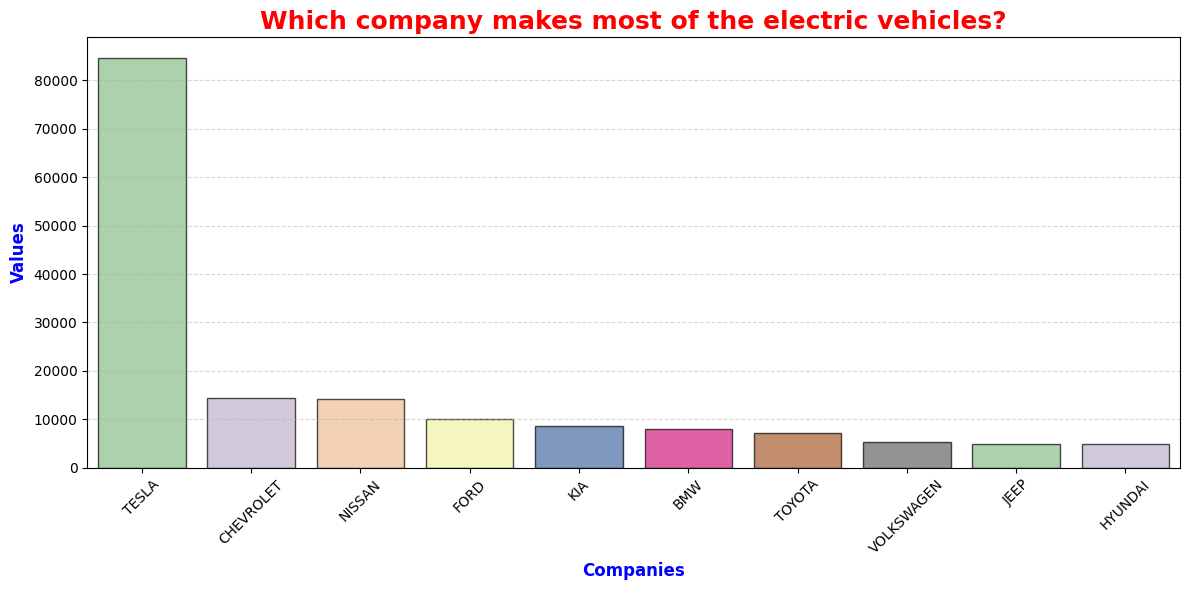

TESLA: 84667
CHEVROLET: 14320
NISSAN: 14239
FORD: 10048
KIA: 8671
BMW: 7993
TOYOTA: 7181
VOLKSWAGEN: 5408
JEEP: 4996
HYUNDAI: 4977


In [15]:
#group by 'Make', count occurrences, sort by 'City' in descending order 
vehicles_counts_by_name = electric_vehicles.groupby('Make').count().sort_values(by = 'City', ascending = False)
companies = vehicles_counts_by_name.index
values = vehicles_counts_by_name['City'].values

#select just the top 10 companies 
top_companies = companies[:10]
top_values = values[:10]

#plot the 10 companies
plt.figure(figsize = (12, 6))
sns.barplot(x = top_companies, y = top_values, edgecolor = 'black', linewidth = 1, alpha = 0.7, palette = 'Accent', hue=list(companies)[:10], dodge = False, legend = False)
plt.xlabel('Companies', fontsize = 12, fontweight = 'bold', color = 'blue')
plt.ylabel('Values', fontsize = 12, fontweight = 'bold', color = 'blue')
plt.title('Which company makes most of the electric vehicles?', fontsize = 18, fontweight = 'bold', color = 'red')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)

plt.tight_layout()
plt.show()

#print top 10 companies and their values 
for i in range(10):
    print(f"{companies[i]}: {values[i]}")

In [16]:
#for each top 10 company, find and print the top selling model and its count
for company in top_companies:
    company_data = electric_vehicles[electric_vehicles['Make'] == company]
    model_sales_counts = company_data.groupby('Model').size().sort_values(ascending = False)
    top_selling_model = model_sales_counts.index[0]
    top_selling_model_count = model_sales_counts.iloc[0]
    print(f"The top selling model for {company} is {top_selling_model} with {top_selling_model_count} units sold")

The top selling model for TESLA is MODEL Y with 39521 units sold
The top selling model for CHEVROLET is BOLT EV with 6444 units sold
The top selling model for NISSAN is LEAF with 13439 units sold
The top selling model for FORD is MUSTANG MACH-E with 3758 units sold
The top selling model for KIA is NIRO with 3358 units sold
The top selling model for BMW is X5 with 2456 units sold
The top selling model for TOYOTA is PRIUS PRIME with 2985 units sold
The top selling model for VOLKSWAGEN is ID.4 with 4337 units sold
The top selling model for JEEP is WRANGLER with 3743 units sold
The top selling model for HYUNDAI is IONIQ 5 with 2747 units sold


In [17]:
#create a dictionary to store total sales and top model sales
sales_summary = {
    'Company': [],
    'Total Sales': [],
    'Top Model Sales': [],
    'Percentage of Top Model': []
}

for company in top_companies:
    company_data = electric_vehicles[electric_vehicles['Make'] == company]
    total_sales = company_data.shape[0]
    model_sales_counts = company_data.groupby('Model').size().sort_values(ascending = False)
    top_selling_model = model_sales_counts.index[0]
    top_selling_model_count = model_sales_counts.iloc[0]
    
    #calculate the percentage of the top selling model relative to total sales
    top_model_percentage = (top_selling_model_count / total_sales) * 100
    print(f"Percentage of total sales for {top_selling_model} is {top_model_percentage:.2f}%")
    
    sales_summary['Company'].append(company)
    sales_summary['Total Sales'].append(total_sales)
    sales_summary['Top Model Sales'].append(top_selling_model_count)
    sales_summary['Percentage of Top Model'].append(top_model_percentage)
    
df_sales_summary = pd.DataFrame(sales_summary)  #convert the dictionary to a dataframe

Percentage of total sales for MODEL Y is 46.68%
Percentage of total sales for BOLT EV is 45.00%
Percentage of total sales for LEAF is 94.38%
Percentage of total sales for MUSTANG MACH-E is 37.40%
Percentage of total sales for NIRO is 38.73%
Percentage of total sales for X5 is 30.73%
Percentage of total sales for PRIUS PRIME is 41.57%
Percentage of total sales for ID.4 is 80.20%
Percentage of total sales for WRANGLER is 74.92%
Percentage of total sales for IONIQ 5 is 55.19%


/var/folders/nt/j3zdw65j5ys5rx0l1vhss5y40000gn/T/ipykernel_911/3010824659.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_companies * 2)


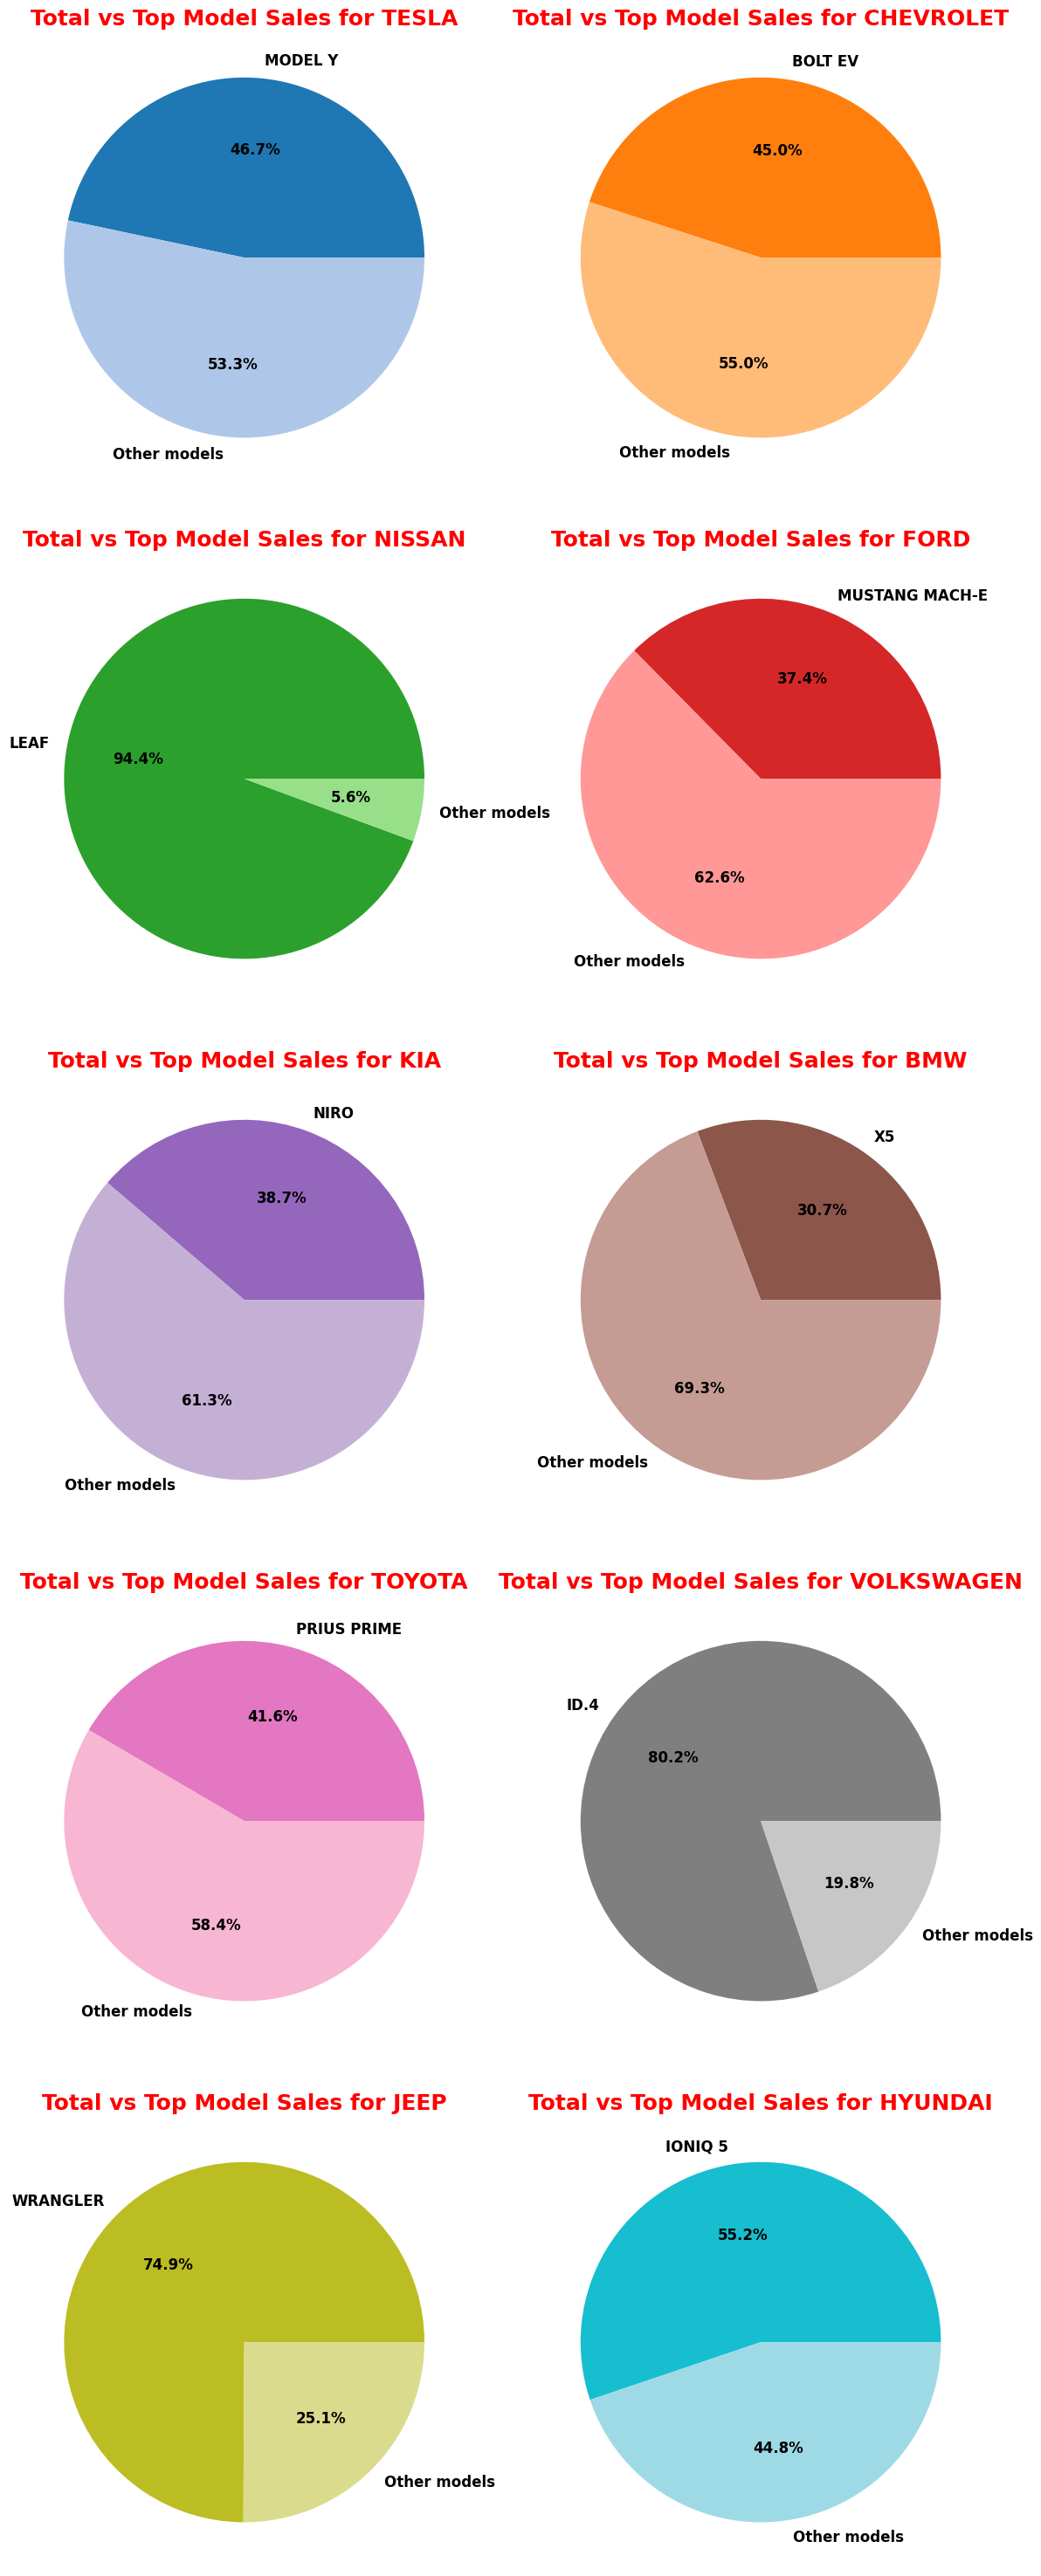

In [18]:
#define a colormap to generate distinctive colors
num_companies = len(top_companies)
cmap = cm.get_cmap('tab20', num_companies * 2) 
num_cols = 2  #two columns and rows for the plots
num_rows = (num_companies + 1) // num_cols  #calculate the necessary number of rows

plt.figure(figsize = (12, 6 * num_rows))

for idx, company in enumerate(top_companies):
    company_data = electric_vehicles[electric_vehicles['Make'] == company]
    total_sales = company_data.shape[0]
    model_sales_counts = company_data.groupby('Model').size().sort_values(ascending = False)
    top_selling_model = model_sales_counts.index[0]
    top_selling_model_count = model_sales_counts.iloc[0]

    sales_data = [top_selling_model_count, total_sales - top_selling_model_count]  #prepare the data for the pie chart
    labels = [top_selling_model, 'Other models']
    colors = [cmap(idx * 2), cmap(idx * 2 + 1)]  #select a pair of distinctive colors for each pie chart 

    #create the pie chart for total and top model sales 
    plt.subplot(num_rows, num_cols, idx + 1) 
    plt.pie(sales_data, labels = labels, autopct = '%1.1f%%', colors = colors,
            textprops = {'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})
    plt.title(f'Total vs Top Model Sales for {company}', fontsize = 18, fontweight = 'bold', color = 'red')

plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
plt.tight_layout()
plt.show()

In [22]:
top_models_info = {'Company': [], 'Top Model': [], 'EV Type': []}  #initialize a dictionary to store the results

for company in top_companies:
    company_data = electric_vehicles[electric_vehicles['Make'] == company]
    top_model_data = company_data.groupby('Model').size().sort_values(ascending = False)
    top_selling_model = top_model_data.index[0]
    top_model_count = top_model_data.iloc[0]
    
    top_model_info_df = company_data[company_data['Model'] == top_selling_model]  #get the electric vehicle type of the top selling model
    ev_type = top_model_info_df['Electric Vehicle Type'].iloc[0]
    
    top_models_info['Company'].append(company)
    top_models_info['Top Model'].append(top_selling_model)
    top_models_info['EV Type'].append(ev_type)

top_models_df = pd.DataFrame(top_models_info)  #create a dataframe from the results
print(top_models_df.to_string(index = False))  #print the dataframe without the index

   Company      Top Model                                EV Type
     TESLA        MODEL Y         Battery Electric Vehicle (BEV)
 CHEVROLET        BOLT EV         Battery Electric Vehicle (BEV)
    NISSAN           LEAF         Battery Electric Vehicle (BEV)
      FORD MUSTANG MACH-E         Battery Electric Vehicle (BEV)
       KIA           NIRO         Battery Electric Vehicle (BEV)
       BMW             X5 Plug-in Hybrid Electric Vehicle (PHEV)
    TOYOTA    PRIUS PRIME Plug-in Hybrid Electric Vehicle (PHEV)
VOLKSWAGEN           ID.4         Battery Electric Vehicle (BEV)
      JEEP       WRANGLER Plug-in Hybrid Electric Vehicle (PHEV)
   HYUNDAI        IONIQ 5         Battery Electric Vehicle (BEV)


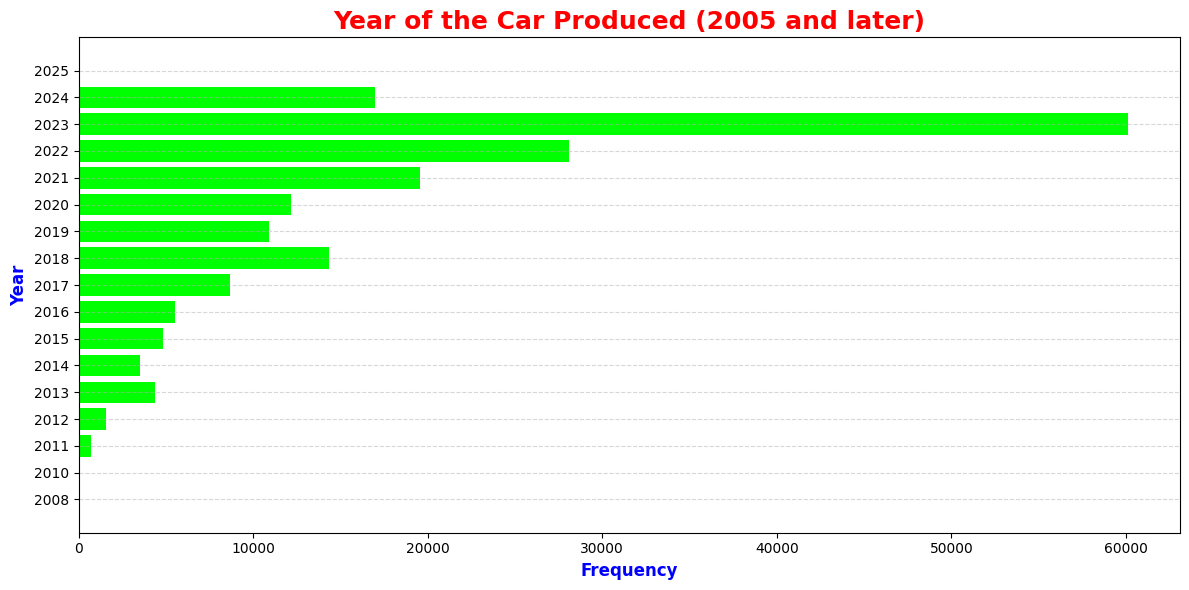

In [42]:
filtered_data = electric_vehicles[electric_vehicles["Model Year"] >= 2005]  #filter the dataframe to include only rows where 'Model Year' is 2005 or later
year_counts = filtered_data["Model Year"].value_counts().reset_index()  #count occurrences of each model year in the filtered data and reset index
year_counts.columns = ["Model Year", "count"]
year_counts = year_counts.sort_values(by = "Model Year")

#create a horizontal bar chart
plt.figure(figsize = (12, 6))
plt.barh(year_counts["Model Year"].astype(str), year_counts["count"], color = "#00FF00")
plt.title("Year of the Car Produced (2005 and later)", fontsize = 18, fontweight = 'bold', color = 'red')
plt.xlabel("Frequency", fontsize = 12, fontweight = 'bold', color = 'blue')
plt.ylabel("Year", fontsize = 12, fontweight = 'bold', color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)

plt.tight_layout()
plt.show()

Model Year
2020     2397
2021     6830
2022     7419
2023    18973
2024     3902
dtype: int64


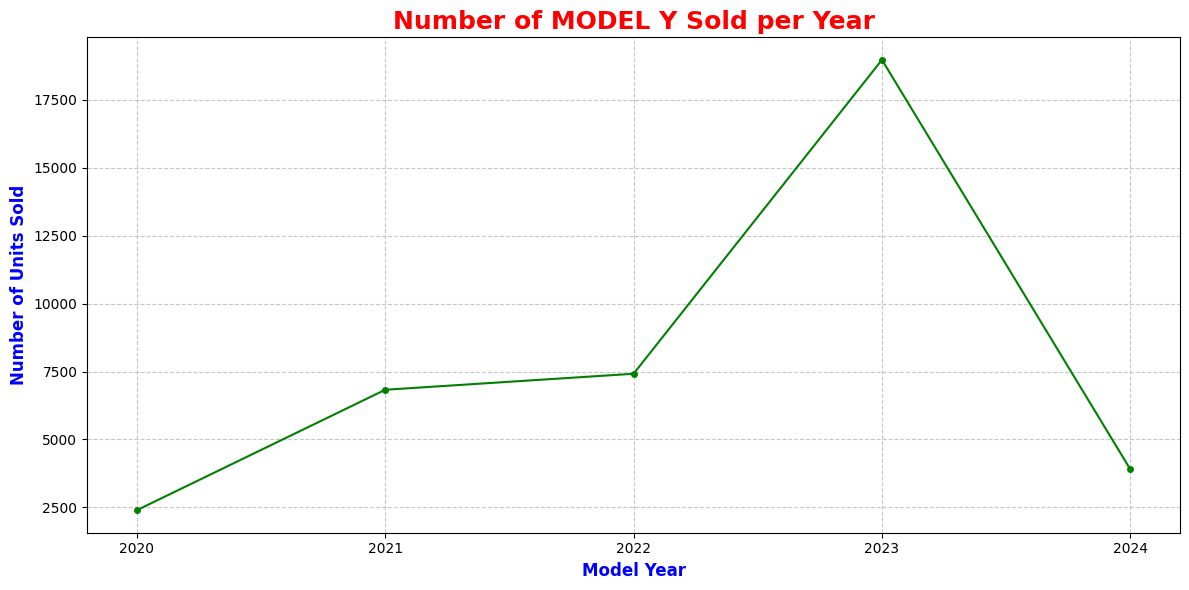

In [44]:
tesla_data = electric_vehicles[electric_vehicles['Make'] == 'TESLA']  #find the top model of Tesla
top_model_data = tesla_data.groupby('Model').size().sort_values(ascending=False)
top_tesla_model = top_model_data.index[0]

top_tesla_model_data = tesla_data[tesla_data['Model'] == top_tesla_model]  #count the number of units sold per year for the top model
yearly_sales = top_tesla_model_data.groupby('Model Year').size()
print(yearly_sales)

#create a line chart
plt.figure(figsize = (12, 6))
plt.plot(yearly_sales.index, yearly_sales.values, color = 'green', linestyle = '-', marker = 'o', markersize = 4)
plt.title(f'Number of {top_tesla_model} Sold per Year', fontweight = 'bold', fontsize = 18, color = 'red')
plt.xlabel('Model Year', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.ylabel('Number of Units Sold', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.xticks(yearly_sales.index, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

Model Year
2017    1446
2018     527
2019    1080
2020    1480
2021     465
2022     306
2023    1140
dtype: int64


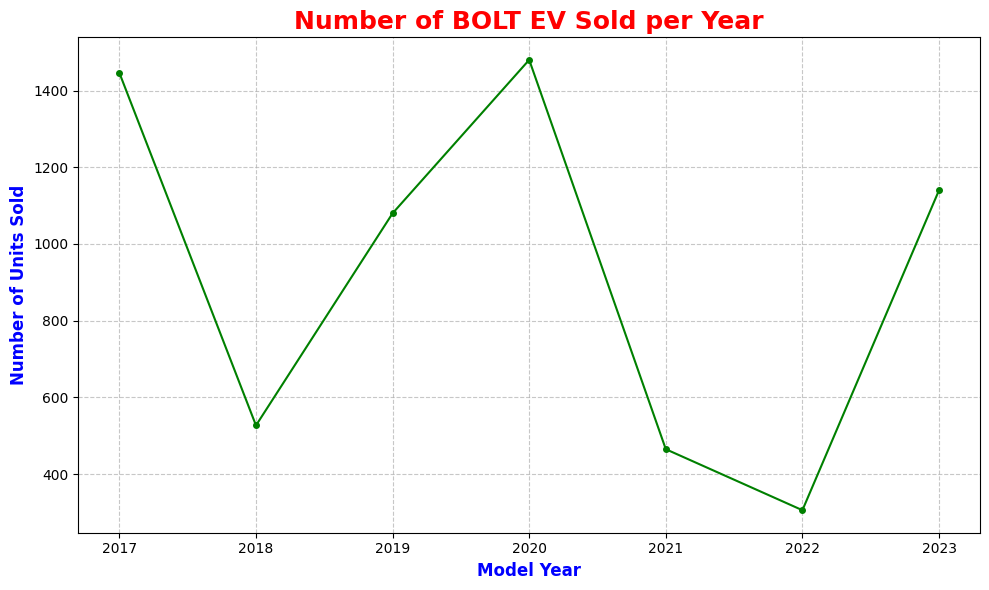

In [45]:
chevrolet_data = electric_vehicles[electric_vehicles['Make'] == 'CHEVROLET']  #find the top model of Chevrolet
top_model_data = chevrolet_data.groupby('Model').size().sort_values(ascending=False)
top_chevrolet_model = top_model_data.index[0]

top_chevrolet_model_data = chevrolet_data[chevrolet_data['Model'] == top_chevrolet_model]  # Count the number of units sold per year for the top model
yearly_sales = top_chevrolet_model_data.groupby('Model Year').size()
print(yearly_sales)

#create a line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, color = 'green', linestyle = '-', marker = 'o', markersize = 4)
plt.title(f'Number of {top_chevrolet_model} Sold per Year', fontweight = 'bold', fontsize = 18, color = 'red')
plt.xlabel('Model Year', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.ylabel('Number of Units Sold', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.xticks(yearly_sales.index, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

Model Year
2011     652
2012     556
2013    1854
2014     625
2015    1803
2016    1111
2017     910
2018    1197
2019    1369
2020     711
2021     686
2022    1069
2023     743
2024     153
dtype: int64


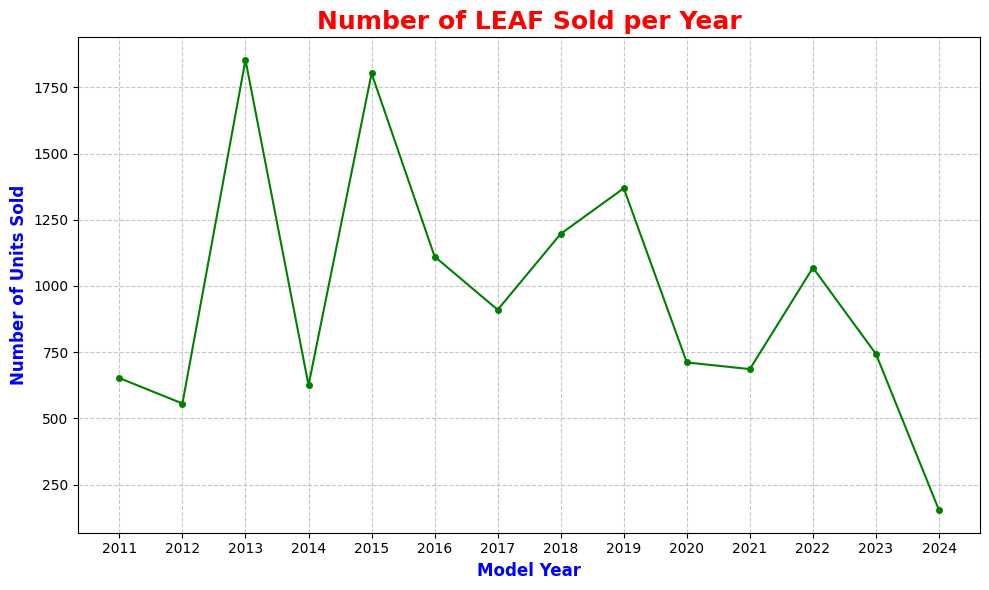

In [47]:
nissan_data = electric_vehicles[electric_vehicles['Make'] == 'NISSAN']  #find the top model of Nissan
top_model_data = nissan_data.groupby('Model').size().sort_values(ascending=False)
top_nissan_model = top_model_data.index[0]

top_nissan_model_data = nissan_data[nissan_data['Model'] == top_nissan_model]  #count the number of units sold per year for the top model
yearly_sales = top_nissan_model_data.groupby('Model Year').size()
print(yearly_sales)

#create a line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, color = 'green', linestyle = '-', marker = 'o', markersize = 4)
plt.title(f'Number of {top_nissan_model} Sold per Year', fontweight = 'bold', fontsize = 18, color = 'red')
plt.xlabel('Model Year', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.ylabel('Number of Units Sold', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.xticks(yearly_sales.index, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

Model Year
2021     874
2022    1042
2023    1826
2024      16
dtype: int64


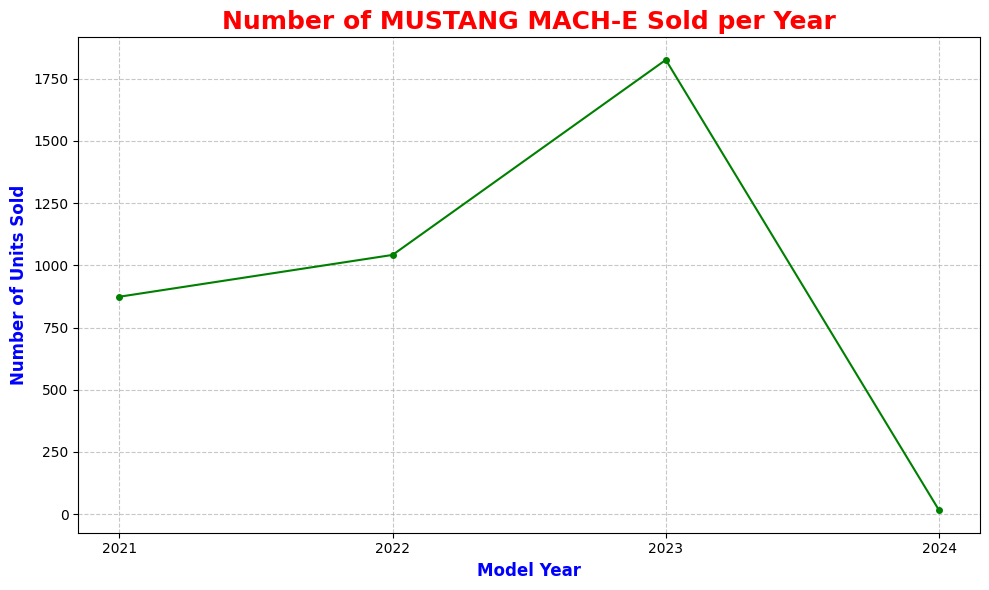

In [48]:
ford_data = electric_vehicles[electric_vehicles['Make'] == 'FORD']  #find the top model of Ford
top_model_data = ford_data.groupby('Model').size().sort_values(ascending=False)
top_ford_model = top_model_data.index[0]

top_ford_model_data = ford_data[ford_data['Model'] == top_ford_model]  #count the number of units sold per year for the top model
yearly_sales = top_ford_model_data.groupby('Model Year').size()
print(yearly_sales)

#create a line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, color = 'green', linestyle = '-', marker = 'o', markersize = 4)
plt.title(f'Number of {top_ford_model} Sold per Year', fontweight = 'bold', fontsize = 18, color = 'red')
plt.xlabel('Model Year', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.ylabel('Number of Units Sold', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.xticks(yearly_sales.index, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

Model Year
2018    194
2019    674
2020    520
2021     80
2022    686
2023    852
2024    352
dtype: int64


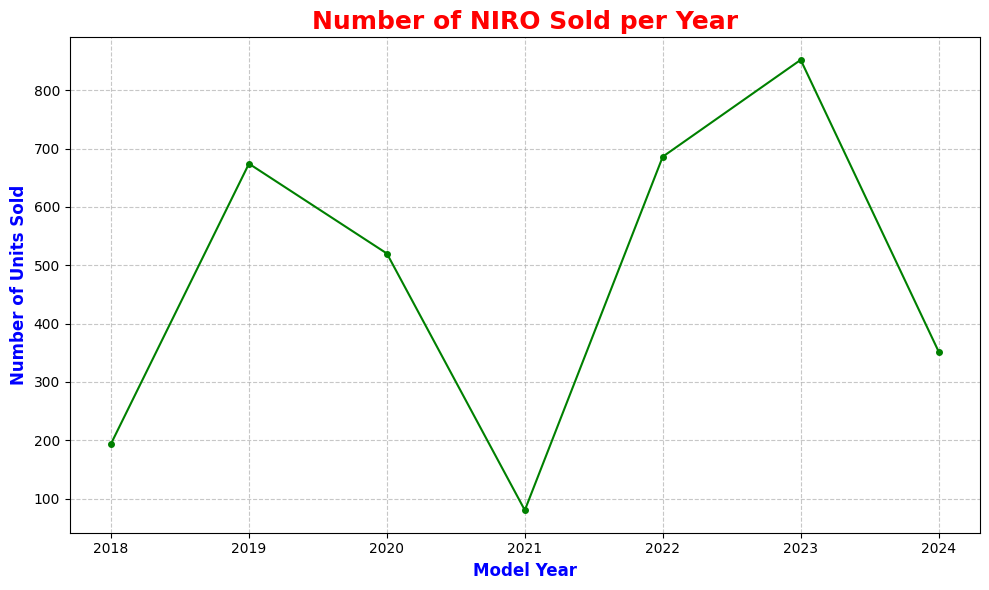

In [49]:
kia_data = electric_vehicles[electric_vehicles['Make'] == 'KIA']  #find the top model of Kia
top_model_data = kia_data.groupby('Model').size().sort_values(ascending=False)
top_kia_model = top_model_data.index[0]

top_kia_model_data = kia_data[kia_data['Model'] == top_kia_model]  #count the number of units sold per year for the top model
yearly_sales = top_kia_model_data.groupby('Model Year').size()
print(yearly_sales)

#create a line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, color = 'green', linestyle = '-', marker = 'o', markersize = 4)
plt.title(f'Number of {top_kia_model} Sold per Year', fontweight = 'bold', fontsize = 18, color = 'red')
plt.xlabel('Model Year', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.ylabel('Number of Units Sold', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.xticks(yearly_sales.index, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

Model Year
2016    162
2017    170
2018    177
2021    314
2022    588
2023    550
2024    495
dtype: int64


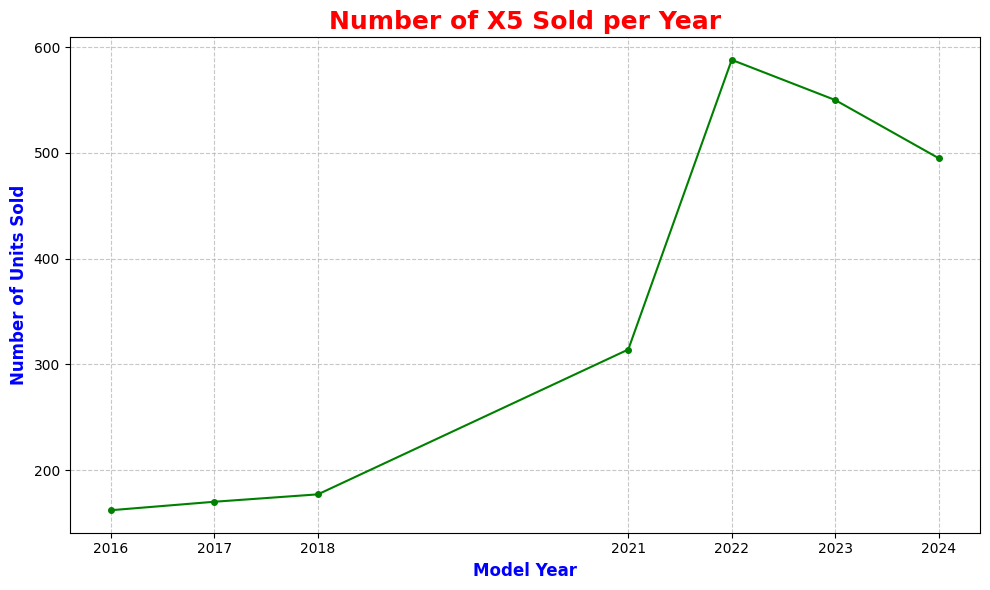

In [51]:
bmw_data = electric_vehicles[electric_vehicles['Make'] == 'BMW']  #find the top model of BMW
top_model_data = bmw_data.groupby('Model').size().sort_values(ascending=False)
top_bmw_model = top_model_data.index[0]

top_bmw_model_data = bmw_data[bmw_data['Model'] == top_bmw_model]  #count the number of units sold per year for the top model
yearly_sales = top_bmw_model_data.groupby('Model Year').size()
print(yearly_sales)

#create a line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, color = 'green', linestyle = '-', marker = 'o', markersize = 4)
plt.title(f'Number of {top_bmw_model} Sold per Year', fontweight = 'bold', fontsize = 18, color = 'red')
plt.xlabel('Model Year', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.ylabel('Number of Units Sold', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.xticks(yearly_sales.index, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

Model Year
2017    903
2018    683
2019    220
2020    371
2021    281
2022    206
2023     91
2024    230
dtype: int64


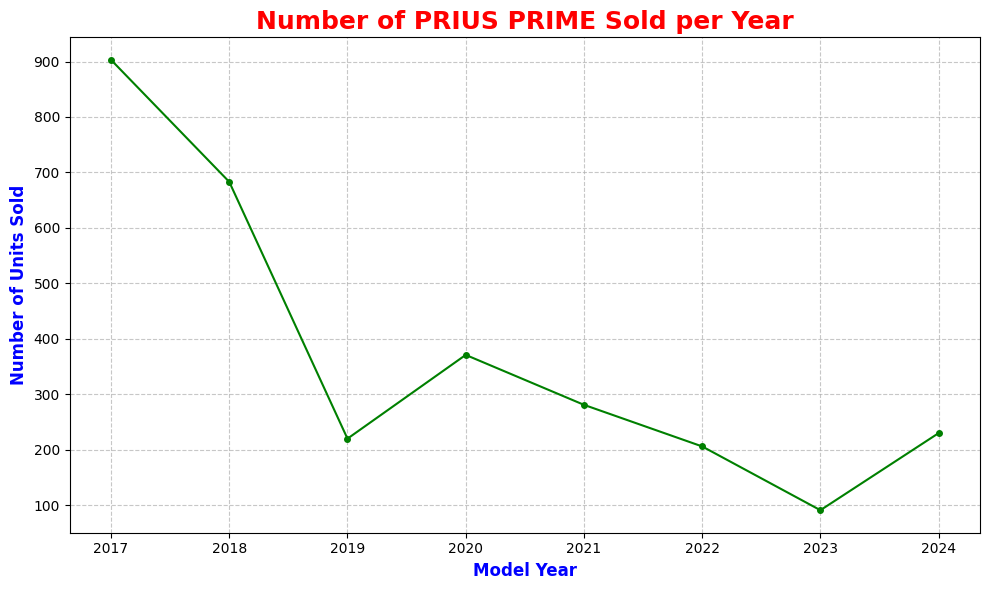

In [52]:
toyota_data = electric_vehicles[electric_vehicles['Make'] == 'TOYOTA']  #find the top model of Toyota
top_model_data = toyota_data.groupby('Model').size().sort_values(ascending=False)
top_toyota_model = top_model_data.index[0]

top_toyota_model_data = toyota_data[toyota_data['Model'] == top_toyota_model]  #count the number of units sold per year for the top model
yearly_sales = top_toyota_model_data.groupby('Model Year').size()
print(yearly_sales)

#create a line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, color = 'green', linestyle = '-', marker = 'o', markersize = 4)
plt.title(f'Number of {top_toyota_model} Sold per Year', fontweight = 'bold', fontsize = 18, color = 'red')
plt.xlabel('Model Year', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.ylabel('Number of Units Sold', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.xticks(yearly_sales.index, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

Model Year
2021     994
2022     725
2023    2592
2024      26
dtype: int64


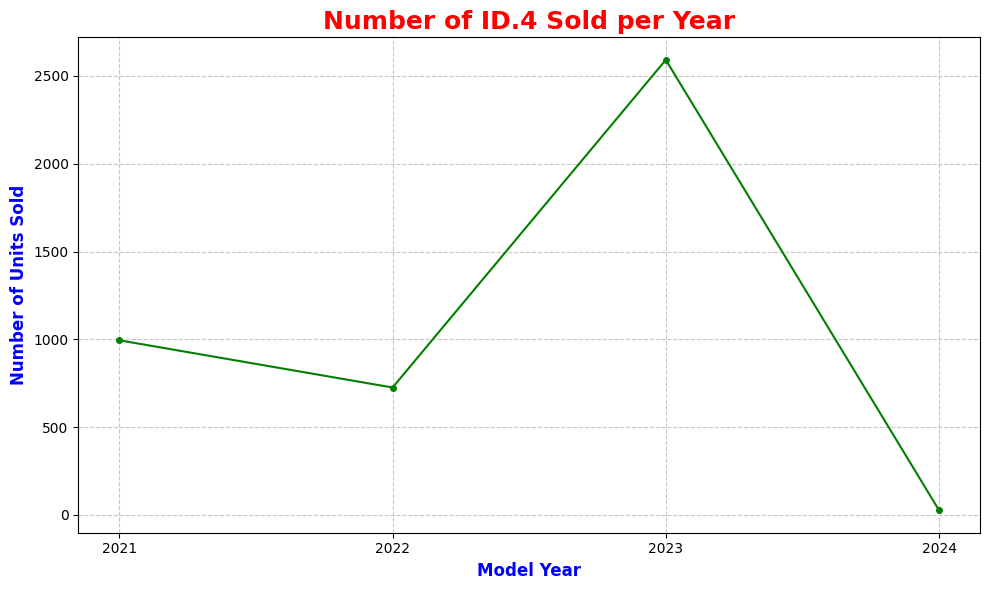

In [53]:
volkswagen_data = electric_vehicles[electric_vehicles['Make'] == 'VOLKSWAGEN']  #find the top model of Volkswagen
top_model_data = volkswagen_data.groupby('Model').size().sort_values(ascending=False)
top_volkswagen_model = top_model_data.index[0]

top_volkswagen_model_data = volkswagen_data[volkswagen_data['Model'] == top_volkswagen_model]  #count the number of units sold per year for the top model
yearly_sales = top_volkswagen_model_data.groupby('Model Year').size()
print(yearly_sales)

#create a line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, color = 'green', linestyle = '-', marker = 'o', markersize = 4)
plt.title(f'Number of {top_volkswagen_model} Sold per Year', fontweight = 'bold', fontsize = 18, color = 'red')
plt.xlabel('Model Year', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.ylabel('Number of Units Sold', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.xticks(yearly_sales.index, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

Model Year
2021     602
2022     489
2023    1462
2024    1190
dtype: int64


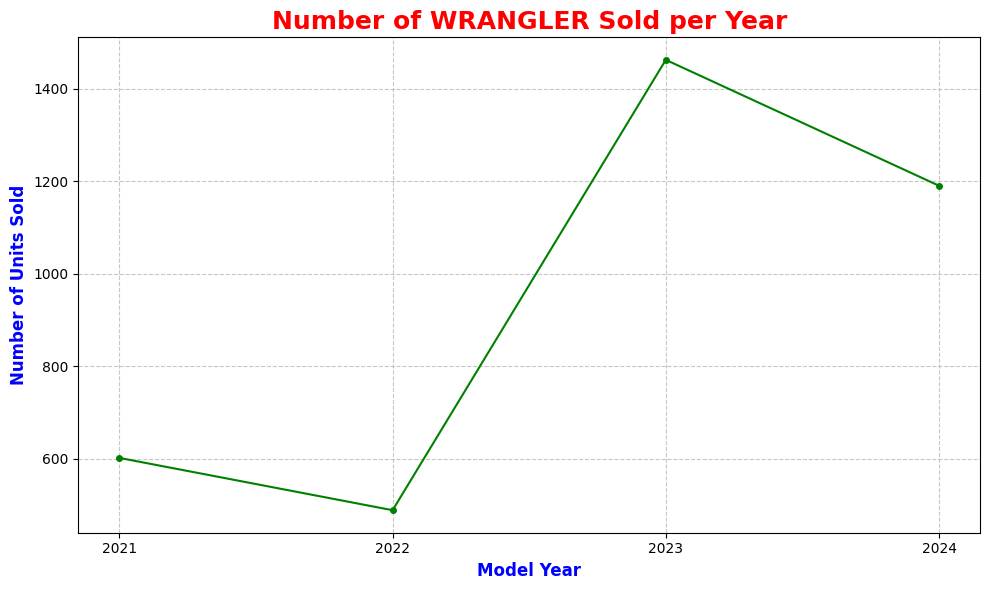

In [55]:
jeep_data = electric_vehicles[electric_vehicles['Make'] == 'JEEP']  #find the top model of Jeep
top_model_data = jeep_data.groupby('Model').size().sort_values(ascending=False)
top_jeep_model = top_model_data.index[0]

top_jeep_model_data = jeep_data[jeep_data['Model'] == top_jeep_model]  #count the number of units sold per year for the top model
yearly_sales = top_jeep_model_data.groupby('Model Year').size()
print(yearly_sales)

#create a line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, color = 'green', linestyle = '-', marker = 'o', markersize = 4)
plt.title(f'Number of {top_jeep_model} Sold per Year', fontweight = 'bold', fontsize = 18, color = 'red')
plt.xlabel('Model Year', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.ylabel('Number of Units Sold', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.xticks(yearly_sales.index, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

Model Year
2022     423
2023    1865
2024     459
dtype: int64


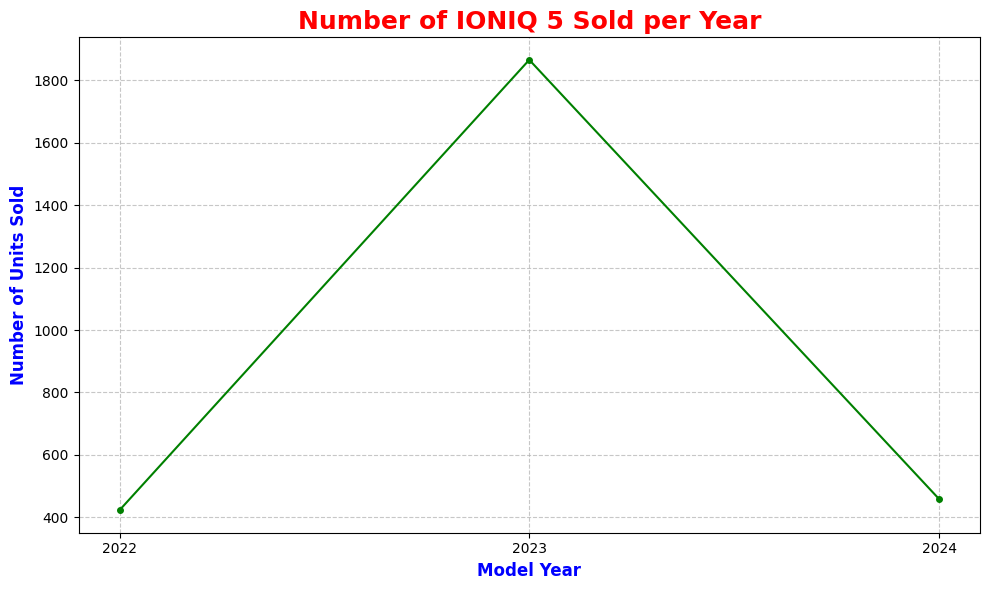

In [57]:
hyundai_data = electric_vehicles[electric_vehicles['Make'] == 'HYUNDAI']  #find the top model of Hyundai
top_model_data = hyundai_data.groupby('Model').size().sort_values(ascending=False)
top_hyundai_model = top_model_data.index[0]

top_hyundai_model_data = hyundai_data[hyundai_data['Model'] == top_hyundai_model]  #count the number of units sold per year for the top model
yearly_sales = top_hyundai_model_data.groupby('Model Year').size()
print(yearly_sales)

#create a line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, color = 'green', linestyle = '-', marker = 'o', markersize = 4)
plt.title(f'Number of {top_hyundai_model} Sold per Year', fontweight = 'bold', fontsize = 18, color = 'red')
plt.xlabel('Model Year', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.ylabel('Number of Units Sold', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.xticks(yearly_sales.index, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

In [20]:
electric_vehicles_corr = electric_vehicles.corr(numeric_only = True)
electric_vehicles_corr

,Model Year,Electric Range,Base MSRP
Model Year,1.00000,-0.491690,-0.230330
Electric Range,-0.49169,1.000000,0.110365
Base MSRP,-0.23033,0.110365,1.000000
